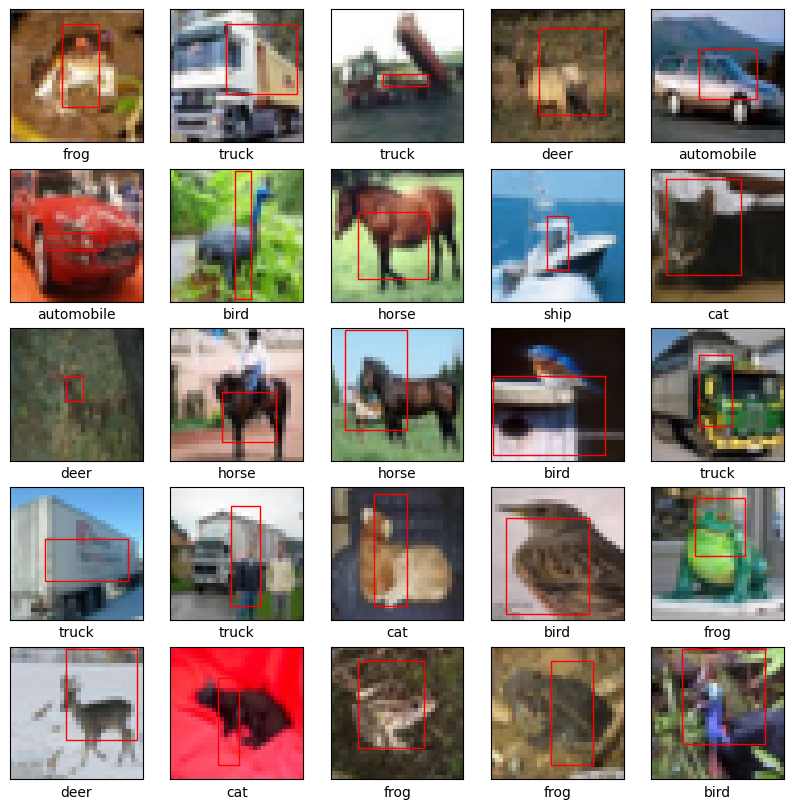

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.3451 - loss: 1.7695 - val_accuracy: 0.5065 - val_loss: 1.3837
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.5652 - loss: 1.2267 - val_accuracy: 0.6047 - val_loss: 1.1145
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 55ms/step - accuracy: 0.6263 - loss: 1.0548 - val_accuracy: 0.6567 - val_loss: 0.9894
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 47ms/step - accuracy: 0.6679 - loss: 0.9462 - val_accuracy: 0.6487 - val_loss: 1.0197
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.6986 - loss: 0.8562 - val_accuracy: 0.6863 - val_loss: 0.9007


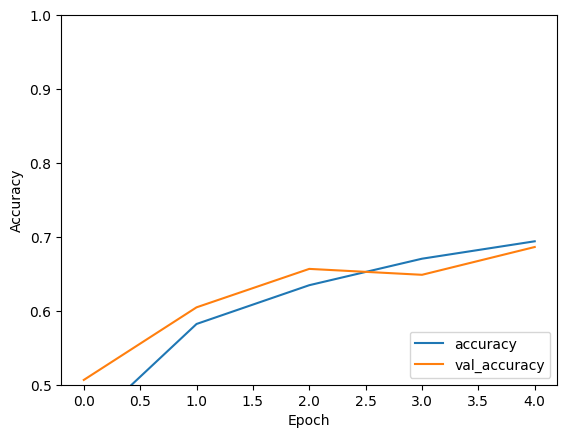

313/313 - 4s - 11ms/step - accuracy: 0.6863 - loss: 0.9007
0.6862999796867371


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

def generate_random_bounding_box(image_shape):
    start_x = np.random.randint(0, image_shape[0] // 2)
    start_y = np.random.randint(0, image_shape[1] // 2)
    end_x = np.random.randint(image_shape[0] // 2, image_shape[0])
    end_y = np.random.randint(image_shape[1] // 2, image_shape[1])
    return start_x, start_y, end_x, end_y

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images[i])
    box = generate_random_bounding_box(train_images[i].shape)
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                      linewidth=1, edgecolor='r', facecolor='none'))
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.ylim([0.5, 1]); plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
